In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt


In [2]:
result = requests.get("https://aoe2.net/api/player/ratinghistory?game=aoe2de&steam_id=76561198448820346&count=1000")

In [3]:
result.status_code

200

In [4]:
data_list=result.json()

In [5]:
data_list=result.json()
list_out =[]

for i in range(0,1000):
    list_out.append(data_list[i]["rating"])
    
print(list_out)    

[1513, 1498, 1483, 1467, 1483, 1501, 1486, 1472, 1489, 1474, 1458, 1474, 1458, 1442, 1426, 1426, 1408, 1408, 1422, 1440, 1422, 1437, 1421, 1436, 1453, 1470, 1454, 1438, 1454, 1470, 1453, 1440, 1454, 1438, 1454, 1439, 1455, 1471, 1486, 1470, 1455, 1441, 1425, 1438, 1423, 1438, 1423, 1439, 1423, 1438, 1423, 1408, 1423, 1406, 1422, 1406, 1423, 1435, 1447, 1459, 1443, 1460, 1443, 1428, 1443, 1460, 1477, 1461, 1445, 1429, 1413, 1399, 1384, 1400, 1385, 1397, 1411, 1398, 1380, 1396, 1412, 1397, 1412, 1396, 1408, 1423, 1440, 1456, 1470, 1456, 1439, 1455, 1439, 1455, 1438, 1423, 1406, 1421, 1436, 1423, 1408, 1425, 1409, 1426, 1411, 1397, 1413, 1397, 1413, 1431, 1416, 1431, 1446, 1462, 1476, 1463, 1447, 1432, 1446, 1434, 1450, 1467, 1480, 1463, 1479, 1464, 1451, 1437, 1447, 1460, 1474, 1459, 1442, 1457, 1474, 1490, 1507, 1521, 1505, 1489, 1505, 1490, 1474, 1460, 1475, 1489, 1472, 1460, 1444, 1427, 1442, 1426, 1441, 1456, 1442, 1456, 1440, 1425, 1440, 1456, 1471, 1455, 1440, 1426, 1442, 1456, 144

In [6]:
data_list=result.json()
list_out2 =[]

for i in range(0,1000):
    list_out2.append(data_list[i]["timestamp"])
    
print(list_out2) 

[1629007612, 1628912823, 1628910763, 1628902908, 1628901740, 1628898598, 1628897411, 1628895956, 1628833725, 1628832619, 1628831814, 1628746064, 1628744680, 1628661884, 1628659754, 1628659754, 1628658094, 1628658094, 1628657026, 1628574624, 1628572704, 1628570771, 1628569232, 1628567823, 1628566070, 1627771647, 1627770094, 1627599334, 1627597701, 1627538482, 1627537565, 1627536436, 1627535106, 1627533351, 1627528864, 1627527317, 1627525865, 1627524944, 1626852104, 1626849246, 1626847216, 1626846980, 1626845630, 1626844243, 1625981088, 1625893637, 1625890941, 1625883351, 1625881937, 1625879942, 1625878768, 1625876338, 1625873927, 1625873608, 1625870937, 1625868694, 1625809882, 1625809069, 1625808183, 1625805973, 1625803924, 1625726191, 1625724687, 1625717138, 1625709693, 1625636826, 1625635368, 1625626401, 1625551769, 1625545949, 1625543059, 1625541597, 1625540470, 1625469655, 1625468143, 1625466359, 1625462390, 1625459314, 1625456305, 1625455006, 1625453235, 1625388096, 1625386747, 162

In [7]:
X=pd.Series([1594200543, 1594198333, 1594196358, 1594184314, 1594182567, 1594181011, 1594176756, 1594175028, 1594173492, 1594116582, 1594114213, 1594112000, 1594110986, 1594109069, 1594107411, 1594106422, 1594105164, 1594104227, 1594103039, 1594001534, 1593999271, 1593998655, 1593994248, 1593992717, 1593991364, 1593990985, 1593989350, 1593987525, 1593986520, 1593986037, 1593922947, 1593921004, 1593913307, 1593911611, 1593909527, 1593908487, 1593907318, 1593906602, 1593904159, 1593903213, 1593833937, 1593833298, 1593831398, 1593829674, 1593828407, 1593736441, 1593734866, 1593733359, 1593732277, 1593729638, 1593666952, 1593665058, 1593663421, 1593662683, 1593661972, 1593660007, 1593658300, 1593577992, 1593576193, 1593575931, 1593574494, 1593573524, 1593497282, 1593495555, 1593421635, 1593410574, 1593408974, 1593407864, 1593405691, 1593403190, 1593219148, 1593217223, 1593152445, 1593150966, 1593147860, 1593076849, 1593074098, 1593072342, 1593071171, 1593069372, 1593067463, 1593065655, 1593048954, 1593048736, 1593045550, 1593043467, 1593042103, 1592986057, 1592984210, 1592983153, 1592982664, 1592980440, 1592963467, 1592895466, 1592892822, 1592884897, 1592883371, 1592880919, 1592879902, 1592877882, 1592876166, 1592874462, 1592873360, 1592872931, 1592872304, 1592634157, 1592633651, 1592631977, 1592562025, 1592559680, 1592558336, 1592542429, 1592540522, 1592539037, 1592537742, 1592446166, 1592444352, 1592439341, 1592437446, 1592435055, 1592433321, 1592381432, 1592379780, 1592378849, 1592373543, 1592370585, 1592368011, 1592365642, 1592363801, 1592362608, 1592360653, 1592288960, 1592287544, 1592286556, 1592285407, 1592283437, 1592282197, 1592209278, 1592191557, 1592190174, 1592188840, 1592106402, 1592102091, 1591956852, 1591953342, 1591929764, 1591928354, 1591926648, 1591860496, 1591832094, 1591765773, 1591765108, 1591763797, 1591762675, 1591762113, 1591758711, 1591757553, 1591755688, 1591754245, 1591753116, 1591752369, 1591697452, 1591693534, 1591692091, 1591690237, 1591679753, 1591678607, 1591674785, 1591672296, 1591584920, 1591583597, 1591581402, 1591578769, 1591500723, 1591500000, 1591498609, 1591497587, 1591495923, 1591494285, 1591492208, 1591431165, 1591430785, 1591429444, 1591427465, 1591426253, 1591326760, 1591326264, 1591324907, 1591240942, 1591239317, 1591237617, 1591236028, 1591234968, 1591171023, 1591168831, 1591167233, 1591156577, 1591155708, 1591073728, 1591071937, 1591070763, 1591068702, 1591067038, 1591066204, 1591064734, 1590982446, 1590975634, 1590972800, 1590971082, 1590970007, 1590969821, 1590969502, 1590903639, 1590901708, 1590900387, 1590898446, 1590836399, 1590834262, 1590831436, 1590829188, 1590827505, 1590826546, 1590811675, 1590809295, 1590807332, 1590805741, 1590804235, 1590718077, 1590717861, 1590717251, 1590715544, 1590713203, 1590653083, 1590652283, 1590646793, 1590643330, 1590641400, 1590640094, 1590639052, 1590637203, 1590635627, 1590634127, 1590632913, 1590632009, 1590630943, 1590629741, 1590569169, 1590567973, 1590566468, 1590564225, 1590558469, 1590556266, 1590555980, 1590553500, 1590487184, 1590485052, 1590483884, 1590464283, 1590462214, 1590460565, 1590401241, 1590399819, 1590398473, 1590396885, 1590395147, 1590389281, 1590386381, 1590383018, 1590382450, 1590381072, 1590378748, 1590376974, 1590312526, 1590311506, 1590309879, 1590308273, 1590306575, 1590305017, 1590302405, 1590301356, 1590291574, 1590289824, 1590288798, 1590286916, 1590221268, 1590206730, 1590199945, 1590198253, 1590197042, 1590196727, 1590121820, 1590120771, 1590120405, 1590119270, 1590119102, 1590117467, 1590114237, 1590111125, 1590107028, 1590103580, 1590101179, 1590053330, 1590052132, 1590050030, 1590030704, 1590029199, 1590027356, 1590026750, 1590025180, 1590024418, 1589966401, 1589965173, 1589964723, 1589963462, 1589960256, 1589958531, 1589859313, 1589856337, 1589855640, 1589792961, 1589790597, 1589788757, 1589787544, 1589785698, 1589771078, 1589769269, 1589767432, 1589763750, 1589696616, 1589695343, 1589693647, 1589690244, 1589688688, 1589599593, 1589592836, 1589591202, 1589589052, 1589588706, 1589587087, 1589583608, 1589581923, 1589579845, 1589578510, 1589570718, 1589515343, 1589513142, 1589511147, 1589509711, 1589507443, 1589506654, 1589496963, 1589495542, 1589495063, 1589341061, 1589266651, 1589245950, 1589243918, 1589242534, 1589241795, 1589239785, 1589238189, 1589237683, 1589093236, 1589012434, 1589009740, 1589007566, 1589005651, 1589003163, 1588997387, 1588996991, 1588995330, 1588994460, 1588824401, 1588823188, 1588820967, 1588819730, 1588817007, 1588752717, 1588733458, 1588730556, 1588727614, 1588726318, 1588725138, 1588724221, 1588722485, 1588720286, 1588718085, 1588715839, 1588715459, 1588715238, 1588668776, 1588668078, 1588667625, 1588666038, 1588661878, 1588661026, 1588659116, 1588658254, 1588656537, 1588584293, 1588582930, 1588581117, 1588579962, 1588578019, 1588576280, 1588574633, 1588572263, 1588571774, 1588570530, 1588569770, 1588568505, 1588567752, 1588565394, 1588563953, 1588563671, 1588561332, 1588492352, 1588492175, 1588491843, 1588491499, 1588490296, 1588489331, 1588488913, 1588488721, 1588312923, 1588311316, 1588309430, 1588307939, 1588306871, 1588306404, 1588305823, 1588303217, 1588301546, 1588148264, 1588146107, 1588061423, 1588058967, 1588057683, 1588057003, 1588045211, 1587962049, 1587959051, 1587957126, 1587955754, 1587953893, 1587953057, 1587801762, 1587800012, 1587798852, 1587798000, 1587796245, 1587795323, 1587792892, 1587791524, 1587789868, 1587788143, 1587786091, 1587784879, 1587784060, 1587781725, 1587776148, 1587773608, 1587772074, 1587717714, 1587714973, 1587713088, 1587712691, 1587712400, 1587710611, 1587709938, 1587708818, 1587707624, 1587627797, 1587623270, 1587617323, 1587614592, 1587610918, 1587538188, 1587535426, 1587534451, 1587531676, 1587524667, 1587522426, 1587520901, 1587453975, 1587450493, 1587449317, 1587448772, 1587447220, 1587369434, 1587367754, 1587366730, 1587366325, 1587346127, 1587344125, 1587342629, 1587342170, 1587333958, 1587332458, 1587285184, 1587284047, 1587282403, 1587281013, 1587278445, 1587276050, 1587274779, 1587272618, 1587272032, 1587270472, 1587268818, 1587266519, 1587196662, 1587195139, 1587193463, 1587190720, 1587189238, 1587187117, 1587185914, 1587185247, 1587185047, 1587183248, 1587179444, 1587113127, 1587110992, 1587108647, 1587023253, 1587020938, 1587012274, 1587008597, 1587006472, 1587004837, 1587003216, 1587001541, 1586923164, 1586921022, 1586919466, 1586918074, 1586916312, 1586847289, 1586845413, 1586844267, 1586843189, 1586842078, 1586840879, 1586839432, 1586837483, 1586837222, 1586835659, 1586832708, 1586831172, 1586829421, 1586828001, 1586826461, 1586825012, 1586824560, 1586822561, 1586821344, 1586820736, 1586820011, 1586675564, 1586673425, 1586672661, 1586671932, 1586671474, 1586671044, 1586669569, 1586666710, 1586661228, 1586660121, 1586658326, 1586656729, 1586655582, 1586591411, 1586590398, 1586588011, 1586586538, 1586585523, 1586583941, 1586573564, 1586570854, 1586569577, 1586566391, 1586565081, 1586506841, 1586503421, 1586501035, 1586499454, 1586498808, 1586496030, 1586493952, 1586493134, 1586491362, 1586401755, 1586400035, 1586398185, 1586397200, 1586396172, 1586394328, 1586393677, 1586238638, 1586236724, 1586234785, 1586234189, 1586232039, 1586230002, 1586227506, 1586159810, 1586158322, 1586154602, 1586148547, 1586146629, 1586144692, 1586142564, 1586137310, 1586134746, 1586133062, 1586130466, 1586128637, 1586079967, 1586077908, 1586075920, 1586073515, 1586072004, 1586070442, 1586069150, 1586066609, 1586065270, 1586063631, 1586060906, 1586059613, 1586058759, 1586056307, 1586054905, 1586054556, 1586052720, 1586052077, 1586051405, 1585899238, 1585897488, 1585896875, 1585894812, 1585894029, 1585892329, 1585890917, 1585881882, 1585880653, 1585879502, 1585877578, 1585876480, 1585874113, 1585872077, 1585871749, 1585814920, 1585813866, 1585813150, 1585810992, 1585810430, 1585808490, 1585807102, 1585720818, 1585715847, 1585710835, 1585640653, 1585638560, 1585637882, 1585636874, 1585635367, 1585634461, 1585632316, 1585631270, 1585545187, 1585543273, 1585541757, 1585541004, 1585539291, 1585538287, 1585535864, 1585531775, 1585531030, 1585529780, 1585528592, 1585527208, 1585524403, 1585515110, 1585384272, 1585382072, 1585380533, 1585379697, 1585378889, 1585376977, 1585375107, 1585296810, 1585295102, 1585293150, 1585292090, 1585288875, 1585287659, 1585287301, 1585284253, 1585283328, 1585282859, 1585281049, 1585279607, 1585277724, 1585275568, 1585273914, 1585273502, 1585214197, 1585212330, 1585211111, 1585209354, 1585207998, 1585206006, 1585205510, 1585203634, 1585202002, 1585200737, 1585199061, 1585195538, 1585193261, 1585188476, 1585187725, 1585185710, 1585182356, 1585180866, 1585179918, 1585123057, 1585120113, 1585117484, 1585038569, 1585036715, 1585034910, 1585033663, 1585031429, 1585030164, 1585028780, 1585024593, 1585023195, 1585022311, 1585020856, 1585011908, 1585010597, 1585008654, 1585006002, 1584950047, 1584948011, 1584945878, 1584943370, 1584941872, 1584940382, 1584867261, 1584851864, 1584849434, 1584848755, 1584848261, 1584846200, 1584844642, 1584778822, 1584777050, 1584776506, 1584776105, 1584775436, 1584773615, 1584772115, 1584771357, 1584767763, 1584766725, 1584594208, 1584592619, 1584590539, 1584589046, 1584587503, 1584522765, 1584522254, 1584520887, 1584518847, 1584517387, 1584515772, 1584514399, 1584513189, 1584512190, 1584510717, 1584509622, 1584509301, 1584507278, 1584505591, 1584503946, 1584436266, 1584434785, 1584433335, 1584432261, 1584430125, 1584428693, 1584427672, 1584425493, 1584417378, 1584415404, 1584413567, 1584411908, 1584410123, 1584407666, 1584406180, 1584342877, 1584340993, 1584340129, 1584338446, 1584337240, 1584336645, 1584261248, 1584256417, 1584254796, 1584253208, 1584251306, 1584250508, 1584248700, 1584246815, 1584245181, 1584221827, 1584220232, 1584217220, 1584215076, 1584090831, 1584088235, 1584086305, 1584085364, 1584004727, 1584003215, 1584002188, 1583999819, 1583997825, 1583995605, 1583988434, 1583985336, 1583982014, 1583912801, 1583911809, 1583909912, 1583898990, 1583897808, 1583895924, 1583821129, 1583817974, 1583816014, 1583813996, 1583813012, 1583811849, 1583810234, 1583808644, 1583741974, 1583739263, 1583738330, 1583737068, 1583735200, 1583733246, 1583731688, 1583730540, 1583728736, 1583726918, 1583702856, 1583701363, 1583698305, 1583661675, 1583659598, 1583658777, 1583656656, 1583654510, 1583653259, 1583576168, 1583574934, 1583574671, 1583572874, 1583571226, 1583568796, 1583568137, 1583566661, 1583564985, 1583561620, 1583560068, 1583558873, 1583556548, 1583554941, 1583553721, 1583552917, 1583366446, 1583310915, 1583310003, 1583308550, 1583306560, 1583304415, 1583302275, 1583301835, 1583300379, 1583297149, 1583295679, 1583294088, 1583215205, 1583212788, 1583210274, 1583208566, 1583206237, 1583205509, 1583141127, 1583138909, 1583137484, 1583135290, 1583131892, 1583129897, 1583127871, 1583125984, 1583122599, 1583120863, 1583054018, 1583052755, 1583052352, 1583050773, 1583048760, 1583047119, 1583045248, 1583042921, 1582970759, 1582968979, 1582967135, 1582965097, 1582963084, 1582960728, 1582960151, 1582957821, 1582882092, 1582880253, 1582878086, 1582877122, 1582875289, 1582873781, 1582871918, 1582869539, 1582867771, 1582866068, 1582863075, 1582860784, 1582859594, 1582707168, 1582704992, 1582703685, 1582701385, 1582699618, 1582695900, 1582693875, 1582692058, 1582690406, 1582611598, 1582610612, 1582607689, 1582605282, 1582601581, 1582599577, 1582535470, 1582533519, 1582531693, 1582435715, 1582433545, 1582432228, 1582362148, 1582359253, 1582357012, 1582355004, 1582353534, 1582351640, 1582349740, 1582347969, 1582347073, 1582346629, 1582345337, 1582276439, 1582274038, 1582272266, 1582270564, 1582261221, 1582259612, 1582258577, 1582256313, 1582255415, 1582253750, 1582185223, 1582182975, 1582181315, 1582179409, 1582178490, 1582177582, 1582174790, 1582173261, 1582172223, 1582169728, 1582168017, 1582100140, 1582096037, 1582014019, 1582012143, 1582010284, 1582008075, 1582007238])

In [8]:
Y=pd.Series([1393, 1378, 1362, 1374, 1358, 1342, 1359, 1346, 1362, 1347, 1363, 1346, 1360, 1375, 1389, 1372, 1387, 1403, 1421, 1405, 1391, 1376, 1391, 1376, 1392, 1392, 1406, 1420, 1404, 1418, 1403, 1387, 1404, 1419, 1431, 1414, 1431, 1415, 1430, 1415, 1430, 1445, 1443, 1460, 1477, 1463, 1448, 1431, 1446, 1431, 1415, 1401, 1416, 1401, 1411, 1426, 1440, 1456, 1443, 1455, 1470, 1486, 1501, 1489, 1475, 1457, 1439, 1425, 1411, 1429, 1413, 1397, 1415, 1402, 1417, 1401, 1387, 1373, 1358, 1341, 1359, 1328, 1339, 1355, 1369, 1385, 1371, 1388, 1375, 1357, 1373, 1392, 1377, 1394, 1377, 1394, 1380, 1398, 1383, 1367, 1382, 1368, 1384, 1400, 1413, 1428, 1413, 1430, 1445, 1429, 1445, 1428, 1446, 1431, 1445, 1461, 1445, 1459, 1476, 1462, 1477, 1463, 1446, 1461, 1476, 1460, 1447, 1460, 1443, 1459, 1442, 1428, 1440, 1425, 1438, 1453, 1469, 1482, 1467, 1451, 1465, 1481, 1466, 1449, 1433, 1442, 1426, 1441, 1428, 1414, 1400, 1387, 1373, 1390, 1372, 1356, 1342, 1325, 1342, 1361, 1344, 1330, 1346, 1329, 1343, 1360, 1377, 1394, 1408, 1427, 1412, 1397, 1381, 1397, 1382, 1397, 1383, 1367, 1382, 1399, 1382, 1397, 1414, 1432, 1449, 1466, 1450, 1432, 1413, 1399, 1385, 1401, 1413, 1427, 1413, 1426, 1438, 1423, 1404, 1388, 1373, 1357, 1371, 1391, 1405, 1419, 1406, 1390, 1375, 1360, 1343, 1328, 1343, 1328, 1339, 1324, 1358, 1342, 1357, 1373, 1357, 1342, 1358, 1344, 1358, 1342, 1310, 1296, 1310, 1325, 1340, 1353, 1339, 1323, 1310, 1295, 1281, 1297, 1312, 1297, 1316, 1302, 1318, 1332, 1346, 1362, 1375, 1362, 1378, 1364, 1346, 1328, 1346, 1363, 1380, 1364, 1375, 1391, 1377, 1393, 1407, 1389, 1402, 1387, 1370, 1383, 1371, 1355, 1341, 1323, 1308, 1322, 1339, 1323, 1307, 1322, 1339, 1356, 1340, 1325, 1357, 1372, 1358, 1373, 1387, 1374, 1359, 1340, 1322, 1337, 1323, 1308, 1295, 1278, 1292, 1306, 1321, 1304, 1321, 1303, 1317, 1330, 1314, 1329, 1344, 1328, 1345, 1330, 1343, 1358, 1373, 1359, 1344, 1360, 1374, 1391, 1378, 1363, 1346, 1361, 1345, 1331, 1348, 1362, 1379, 1364, 1382, 1369, 1385, 1371, 1388, 1375, 1390, 1405, 1419, 1405, 1388, 1408, 1424, 1410, 1398, 1382, 1366, 1381, 1367, 1380, 1395, 1409, 1425, 1440, 1457, 1443, 1430, 1443, 1427, 1435, 1419, 1404, 1390, 1374, 1387, 1404, 1388, 1372, 1356, 1341, 1352, 1337, 1323, 1338, 1352, 1367, 1379, 1365, 1379, 1362, 1348, 1367, 1365, 1349, 1335, 1319, 1305, 1322, 1337, 1354, 1340, 1321, 1336, 1353, 1337, 1320, 1336, 1351, 1336, 1351, 1337, 1322, 1306, 1322, 1336, 1351, 1365, 1378, 1358, 1344, 1328, 1315, 1327, 1314, 1300, 1316, 1301, 1284, 1300, 1284, 1265, 1280, 1295, 1325, 1341, 1358, 1372, 1387, 1372, 1356, 1371, 1387, 1372, 1355, 1373, 1387, 1401, 1416, 1403, 1390, 1376, 1362, 1346, 1362, 1346, 1360, 1376, 1359, 1342, 1327, 1342, 1326, 1310, 1327, 1341, 1326, 1342, 1327, 1343, 1325, 1309, 1295, 1310, 1324, 1339, 1323, 1308, 1322, 1306, 1322, 1337, 1355, 1369, 1385, 1402, 1416, 1430, 1413, 1394, 1378, 1392, 1408, 1394, 1382, 1393, 1402, 1386, 1372, 1389, 1376, 1363, 1377, 1363, 1380, 1396, 1380, 1396, 1385, 1370, 1355, 1341, 1326, 1311, 1296, 1326, 1342, 1326, 1340, 1356, 1342, 1327, 1342, 1328, 1344, 1327, 1342, 1328, 1343, 1360, 1344, 1361, 1344, 1359, 1375, 1387, 1400, 1383, 1365, 1378, 1392, 1377, 1394, 1375, 1360, 1375, 1391, 1408, 1395, 1378, 1366, 1350, 1335, 1347, 1332, 1317, 1334, 1319, 1335, 1318, 1331, 1345, 1330, 1316, 1332, 1347, 1332, 1319, 1306, 1320, 1305, 1288, 1303, 1287, 1302, 1318, 1333, 1351, 1371, 1384, 1375, 1390, 1376, 1361, 1378, 1361, 1374, 1358, 1341, 1356, 1373, 1387, 1400, 1387, 1370, 1386, 1371, 1357, 1343, 1326, 1342, 1326, 1340, 1320, 1335, 1351, 1338, 1348, 1334, 1353, 1338, 1323, 1337, 1350, 1365, 1378, 1362, 1347, 1331, 1348, 1362, 1378, 1394, 1379, 1362, 1350, 1336, 1350, 1336, 1319, 1332, 1343, 1327, 1311, 1295, 1281, 1268, 1257, 1272, 1287, 1304, 1318, 1303, 1288, 1271, 1286, 1303, 1318, 1303, 1287, 1270, 1256, 1272, 1255, 1271, 1256, 1272, 1288, 1272, 1288, 1305, 1320, 1335, 1320, 1305, 1319, 1333, 1347, 1331, 1316, 1332, 1348, 1336, 1354, 1372, 1388, 1373, 1361, 1347, 1362, 1347, 1364, 1376, 1395, 1381, 1397, 1383, 1367, 1383, 1371, 1355, 1341, 1326, 1339, 1323, 1337, 1322, 1337, 1353, 1339, 1323, 1310, 1324, 1340, 1355, 1372, 1359, 1343, 1329, 1345, 1329, 1343, 1358, 1344, 1329, 1345, 1329, 1312, 1329, 1312, 1298, 1315, 1330, 1315, 1301, 1320, 1309, 1297, 1314, 1333, 1350, 1335, 1352, 1359, 1346, 1362, 1346, 1361, 1346, 1328, 1342, 1357, 1341, 1358, 1374, 1386, 1395, 1381, 1367, 1382, 1399, 1384, 1372, 1384, 1368, 1355, 1339, 1322, 1338, 1355, 1338, 1352, 1337, 1351, 1361, 1372, 1387, 1371, 1356, 1372, 1358, 1373, 1387, 1372, 1355, 1339, 1355, 1340, 1354, 1368, 1354, 1373, 1386, 1399, 1385, 1370, 1350, 1337, 1350, 1360, 1371, 1360, 1378, 1394, 1378, 1391, 1380, 1396, 1379, 1395, 1382, 1396, 1405, 1392, 1377, 1391, 1372, 1357, 1374, 1388, 1376, 1359, 1344, 1327, 1312, 1329, 1315, 1331, 1318, 1329, 1315, 1300, 1318, 1332, 1348, 1337, 1350, 1367, 1352, 1367, 1353, 1339, 1352, 1336, 1322, 1306, 1291, 1303, 1321, 1336, 1353, 1368, 1383, 1399, 1381, 1368, 1382, 1370, 1354, 1369, 1351, 1367, 1352, 1366, 1378, 1366, 1353, 1364, 1351, 1356, 1341, 1329, 1343, 1325, 1307, 1292, 1280, 1290, 1277, 1262, 1246, 1260, 1245, 1263, 1281, 1265, 1249, 1263, 1249, 1232, 1247, 1265, 1283, 1298, 1313, 1330, 1340, 1360, 1344, 1327, 1310, 1323, 1309, 1322, 1305, 1287, 1301, 1317, 1334, 1315, 1299, 1316, 1301, 1312, 1297, 1312, 1326, 1308, 1325, 1340, 1353, 1334, 1318, 1303, 1317, 1331, 1346, 1330, 1316, 1300, 1282, 1298, 1314, 1301, 1315, 1330, 1346, 1331, 1313, 1320, 1337, 1322, 1340, 1329, 1340, 1324, 1340, 1356, 1371, 1354, 1337, 1319, 1304, 1290, 1308, 1296, 1282, 1299, 1284, 1299, 1287, 1303, 1288, 1305, 1319, 1335, 1321, 1307, 1297, 1282, 1297, 1311, 1324, 1342, 1309, 1322, 1332, 1320, 1302, 1287, 1304, 1317, 1328, 1341, 1358, 1341, 1357, 1345, 1362, 1344, 1331, 1317, 1336, 1321, 1335, 1352, 1337, 1354, 1340, 1355, 1370, 1357, 1341, 1325, 1311, 1325, 1340, 1328, 1312, 1328, 1345, 1329, 1343, 1359, 1346, 1358, 1377, 1363, 1348, 1328, 1316, 1327, 1315, 1331, 1343])

In [9]:
lm = LinearRegression()

In [10]:
X_data=X[:,np.newaxis]

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [11]:
lm.fit(X[:,np.newaxis],Y[:,np.newaxis])

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/alex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/alex/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

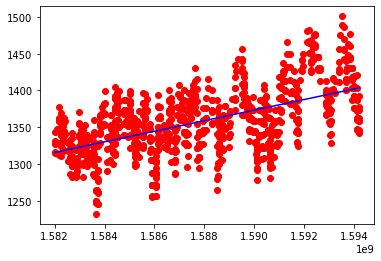

In [12]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data), color = "blue")

In [14]:
lm.predict(X_data).shape

(1000, 1)

In [15]:
SSD = np.sum((Y[:,np.newaxis]-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean,error*100

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(1341762.2731912471, 36.6484021284669, 1356.947, 2.700798345732508)

In [70]:
Y[:,np.newaxis].shape

(1000, 1)

In [53]:
lm.score(X_data, Y)

0.31429816952501477

In [56]:
Y


0      1393
1      1378
2      1362
3      1374
4      1358
       ... 
995    1316
996    1327
997    1315
998    1331
999    1343
Length: 1000, dtype: int64